In [1]:
import os
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']
import h5py

from utils import read_units, compute_arepo_units, read_momentum_bins

In [2]:
fnames = [ "snapshot_110.hdf5", "snapshot_115.hdf5" , "snapshot_100.hdf5", "snapshot_105.hdf5" ]
folder = 'Full_DB/'
files = [folder+i for i in fnames]

In [15]:
# initialize training dataset arrays
pos_arr = []
rad_arr = []
dens_arr = []
mass_arr = []
vol_arr = []
gpot_arr = []
pres_arr = []
mag_arr = []
Babs_arr = []
encr_arr = [] # is this supposed to be a target array?
# target array
slope_arr = []
cr_specs = []
centers = []
for i, filename in enumerate(files):

    # open file
    f = h5py.File(filename)
    #if filename == files[0]:
    #    for k in f["PartType0"].keys():
    #        print(k)
    
    # read units from file
    UnitM, UnitL, UnitV, BoxSize = read_units(filename)
    U = compute_arepo_units(UnitM, UnitL, UnitV, False)
    
    # read momenta
    pf, pi = read_momentum_bins(filename)
    #print(pi)
    print(f['PartType0'].keys())
    BoxCtr = BoxSize*U["UnitLength"]/2.

    # get full data and convert it to cgs
    
    # positions
    pos  = np.array(f[u'PartType0/Coordinates']).astype(np.float64)*U["UnitLength"]-BoxCtr
    rad  = np.sqrt(np.sum(pos**2,axis=1))

    # pos_arr += list(pos)
    rad_arr += list(rad)

    # density, mass and volume
    dens = np.array(f[u'PartType0/Density']).astype(np.float64)*U["UnitDensity"]
    mass = np.array(f[u'PartType0/Masses'])*U["UnitMass"]
    volu = mass/dens

    dens_arr += list(dens)
    mass_arr += list(mass)
    vol_arr += list(volu)

    # gravitational potential
    gpot = np.array(f[u'PartType0/Potential']).astype(np.float64)*U["UnitPotential"]

    gpot_arr += list(gpot)

    # thermal pressure
    pres = np.array(f[u'PartType0/Pressure']).astype(np.float64)*U["UnitPressure"]

    pres_arr += list(pres)

    # magnetic field vector
    mag  = np.array(f[u'PartType0/MagneticField']).astype(np.float64)*U["UnitBfield"]
    Babs = np.sqrt(np.sum(mag**2,axis=1))

    mag_arr += list(mag)
    Babs_arr += list(Babs)
    
    # total CR energy density
    cren = np.array(f[u'PartType0/CosmicRaySpecificEnergy']).astype(np.float64)*U["UnitEspecific"]
    encr = cren*dens

    encr_arr += list(encr)
    
    # CR spectrum amplitude
    crspec = np.array(f[u'PartType0/CRspecEnergy']).astype(np.float64)
    
    crx = np.array(f[u'PartType0/CRspecNumber']).astype(np.float64)
    
    # CR sprectral slope
    slope  = np.log(crspec[:,-1]/crspec[:,-2]) / np.log(pi[-1]/pi[-2])

    slope_arr += list(slope)
    
    idcs = np.where(dens > 1e-29)
    ichk = np.argsort(rad[idcs])[0]
    if i == 0:
        centers.append(ichk)
        prev_len = rad[idcs].shape[0]
    else:
        centers.append(ichk+prev_len)
        prev_len += rad[idcs].shape[0]
        
    
    cr_specs.extend(crspec)
# put em in numpy
# training dataset arrays
pos_arr = np.asarray(pos_arr)
rad_arr = np.asarray(rad_arr)
dens_arr = np.asarray(dens_arr)
mass_arr = np.asarray(mass_arr)
vol_arr = np.asarray(vol_arr)
gpot_arr = np.asarray(gpot_arr)
pres_arr = np.asarray(pres_arr)
mag_arr = np.asarray(mag_arr)
Babs_arr = np.asarray(Babs_arr)
encr_arr = np.asarray(encr_arr)
# target array
slope_arr = np.asarray(slope_arr)
cr_specs = np.asarray(cr_specs)

/home/dani/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


reading file:  Full_DB/snapshot_110.hdf5
reading file:  Full_DB/snapshot_110.hdf5
<KeysViewHDF5 ['CRPressureGradient', 'CRspecDistFunc', 'CRspecEnergy', 'CRspecNumber', 'CRspecSlope', 'Coordinates', 'CosmicRaySpecificEnergy', 'Density', 'ElectronAbundance', 'InternalEnergy', 'MagneticField', 'MagneticFieldDivergence', 'MagneticFieldDivergenceAlternative', 'Masses', 'NeutralHydrogenAbundance', 'ParticleIDs', 'Potential', 'Pressure', 'StarFormationRate', 'Velocities', 'VelocityDivergence']>
reading file:  Full_DB/snapshot_115.hdf5
reading file:  Full_DB/snapshot_115.hdf5
<KeysViewHDF5 ['CRPressureGradient', 'CRspecDistFunc', 'CRspecEnergy', 'CRspecNumber', 'CRspecSlope', 'Coordinates', 'CosmicRaySpecificEnergy', 'Density', 'ElectronAbundance', 'InternalEnergy', 'MagneticField', 'MagneticFieldDivergence', 'MagneticFieldDivergenceAlternative', 'Masses', 'NeutralHydrogenAbundance', 'ParticleIDs', 'Potential', 'Pressure', 'StarFormationRate', 'Velocities', 'VelocityDivergence']>
reading file

/home/dani/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  # Remove the CWD from sys.path while we load stuff.


CRPressureGradient
CRspecDistFunc
CRspecEnergy
CRspecNumber
CRspecSlope
Coordinates
CosmicRaySpecificEnergy
Density
ElectronAbundance
InternalEnergy
MagneticField
MagneticFieldDivergence
MagneticFieldDivergenceAlternative
Masses
NeutralHydrogenAbundance
ParticleIDs
Potential
Pressure
StarFormationRate
Velocities
VelocityDivergence
reading file:  Full_DB/snapshot_110.hdf5
reading file:  Full_DB/snapshot_110.hdf5
properties of the central cells
  position [ 1.21773917e+23 -8.15375203e+23 -1.94769487e+23]
  density  2.583633303091099e-29
reading file:  Full_DB/snapshot_115.hdf5
reading file:  Full_DB/snapshot_115.hdf5


/home/dani/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  # Remove the CWD from sys.path while we load stuff.


properties of the central cells
  position [ 5.61658183e+23 -5.54067159e+23  8.26074270e+21]
  density  5.218087544110336e-29
reading file:  Full_DB/snapshot_100.hdf5
reading file:  Full_DB/snapshot_100.hdf5


/home/dani/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  # Remove the CWD from sys.path while we load stuff.


properties of the central cells
  position [-5.29832420e+23  7.40737683e+23 -1.21744160e+23]
  density  3.605315744694833e-29
reading file:  Full_DB/snapshot_105.hdf5
reading file:  Full_DB/snapshot_105.hdf5


/home/dani/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  # Remove the CWD from sys.path while we load stuff.


properties of the central cells
  position [-4.78943970e+23 -4.58600418e+23 -5.11460922e+21]
  density  5.825650534205644e-29


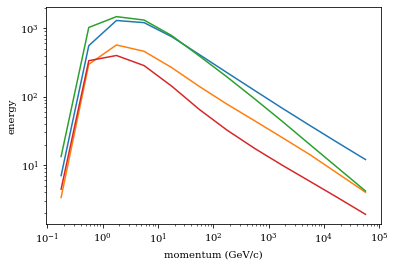

In [36]:
plot_chk_spectra = True

if plot_chk_spectra:
    fig, ax = plt.subplots()
centers = []
# loop over files
for j, filename in enumerate(files):

    # open file
    f = h5py.File(filename)
    if filename == files[0]:
        for k in f["PartType0"].keys():
            print(k)
    
    # read units from file
    UnitM, UnitL, UnitV, BoxSize = read_units(filename)
    U = compute_arepo_units(UnitM, UnitL, UnitV, False)
    
    # read momenta
    pf, pi = read_momentum_bins(filename)
    #print(pi)
    
    BoxCtr = BoxSize*U["UnitLength"]/2.

    # get full data and convert it to cgs
    
    # positions
    pos  = np.array(f[u'PartType0/Coordinates']).astype(np.float64)*U["UnitLength"]-BoxCtr
    rad  = np.sqrt(np.sum(pos**2,axis=1))

    # density, mass and volume
    dens = np.array(f[u'PartType0/Density']).astype(np.float64)*U["UnitDensity"]
    mass = np.array(f[u'PartType0/Masses'])*U["UnitMass"]
    volu = mass/dens

    # gravitational potential
    gpot = np.array(f[u'PartType0/Potential']).astype(np.float64)*U["UnitPotential"]

    # thermal pressure
    pres = np.array(f[u'PartType0/Pressure']).astype(np.float64)*U["UnitPressure"]

    # magnetic field vector
    mag  = np.array(f[u'PartType0/MagneticField']).astype(np.float64)*U["UnitBfield"]
    Babs = np.sqrt(np.sum(mag**2,axis=1))
    
    # total CR energy density
    cren = np.array(f[u'PartType0/CosmicRaySpecificEnergy']).astype(np.float64)*U["UnitEspecific"]
    encr = cren*dens
    
    # CR spectrum amplitude
    crspec = np.array(f[u'PartType0/CRspecEnergy']).astype(np.float64)
    slope  = np.log(crspec[:,-1]/crspec[:,-2]) / np.log(pi[-1]/pi[-2])
    
    # print some checks
    # select cell closest to the centre of the galaxy
    idcs = np.where(dens > 1e-29)
    ichk = np.argsort(rad[idcs])[0]
    if j == 0:
        centers.append(ichk)
        prev_len = rad[idcs].shape[0]
    else:
        centers.append(ichk+prev_len)
        prev_len += rad[idcs].shape[0]
    print("properties of the central cells")
    print("  position", pos[ichk])
    print("  density ", dens[ichk])
    
    if plot_chk_spectra:
        ax.loglog(pi, crspec[idcs][ichk])
        
if plot_chk_spectra:
    ax.set_xlabel("momentum (GeV/c)")
    ax.set_ylabel("energy")
    fig.savefig("spectra-of-central-cell.pdf", bbox_inches="tight")

In [35]:
centers

[4356992, 5227095, 5801676, 6800399]

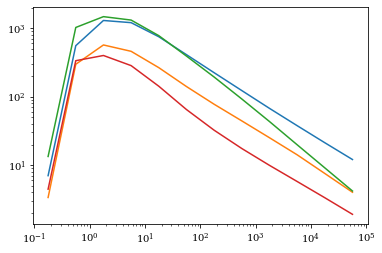

In [38]:
fig, ax = plt.subplots()
for c in centers:
    ax.loglog(pi, cr_specs[idcs][c])
plt.show()

In [37]:
idcs = np.where(dens_arr > 1e-29)

X = np.log10(np.array([rad_arr[idcs], dens_arr[idcs], Babs_arr[idcs], encr_arr[idcs]])).T
print(X.shape) #nsamples, nquantities
#Normalize each input qt
means, stds = [], []
for i in range(X.shape[1]):
    m, std = np.mean(X[:,i]), np.std(X[:,i])
    means.append(m)
    stds.append(std)
    X[:,i] -= m
    X[:,i] /= std

(3525544, 4)


In [39]:
l = np.log10(cr_specs[idcs])
mean, std = np.mean(l), np.std(l)
Y = (l-mean)/std

In [40]:
np.savez('database', input_data = X, output_data = Y, 
         momentum_GeV = pi, input_means = means, 
         input_stds = stds, output_mean = mean,
        output_std = std, centers = centers)